<a href="https://colab.research.google.com/github/gyaneshanand/scikit-learn-tutorials/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification using CNN

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Loader

Train Loader

In [0]:
BATCH_SIZE = 100

In [0]:
train_set = datasets.MNIST('./mnist_data', train=True, download=True,transform=transforms.Compose([transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))]))
train_loader = torch.utils.data.DataLoader(train_set , batch_size=BATCH_SIZE , shuffle=True, num_workers=2)

Test Set

In [0]:
test_set = datasets.MNIST('./mnist_data', train=False, download=True,transform=transforms.Compose([transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))]))
test_loader = torch.utils.data.DataLoader(test_set , batch_size=BATCH_SIZE , shuffle=False, num_workers=2)

## Dataset Visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels:  tensor([0, 1, 7, 0, 4, 8, 0, 2, 4, 1, 2, 2, 2, 1, 7, 4, 4, 2, 5, 7, 1, 8, 6, 1,
        6, 5, 6, 7, 8, 1, 3, 5, 8, 2, 4, 2, 0, 4, 0, 1, 8, 7, 7, 5, 8, 5, 6, 2,
        5, 6, 2, 7, 1, 1, 9, 2, 7, 9, 6, 9, 4, 8, 3, 4, 3, 6, 4, 5, 9, 5, 7, 0,
        5, 5, 5, 0, 3, 2, 8, 9, 7, 6, 2, 7, 9, 0, 3, 8, 9, 5, 0, 9, 8, 3, 1, 4,
        5, 2, 1, 6])
Batch shape:  torch.Size([100, 1, 28, 28])


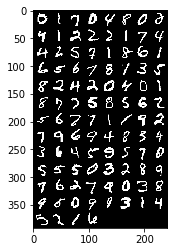

In [0]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())

im = torchvision.utils.make_grid(images)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

## Model

In [0]:
class Model(nn.Module):
    
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Conv2d(1,6,kernel_size=5)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6,10,kernel_size=5)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(160,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool1(x)
        x = x.view(-1,160)
        x = F.relu(self.fc1(x))
        out = self.fc2(x)
        return out     

In [0]:
model = Model()

## Loss & Optimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

## Training the Model

In [23]:
for epoch in range(100):
    for i, data in enumerate(train_loader):
        inputs , labels = data
        
        outputs = model(inputs)
        loss = criterion(outputs,labels)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
    print(epoch,loss.data)

0 tensor(0.1676)
1 tensor(0.0712)
2 tensor(0.0551)
3 tensor(0.0340)
4 tensor(0.0953)
5 tensor(0.0809)
6 tensor(0.0783)
7 tensor(0.0019)
8 tensor(0.0076)
9 tensor(0.0038)
10 tensor(0.0014)
11 tensor(0.0331)
12 tensor(0.0176)
13 tensor(0.0080)
14 tensor(0.0429)
15 tensor(0.0431)
16 tensor(0.0309)
17 tensor(0.0073)
18 tensor(0.0014)
19 tensor(0.0027)
20 tensor(0.0143)
21 tensor(0.0012)
22 tensor(0.0002)
23 tensor(0.0014)
24 tensor(0.0334)
25 tensor(0.0002)
26 tensor(0.0222)
27 tensor(0.0081)
28 tensor(0.0085)
29 tensor(6.5298e-05)
30 tensor(2.1420e-05)
31 tensor(0.0012)
32 tensor(3.0994e-06)
33 tensor(0.0006)
34 tensor(0.0017)
35 tensor(0.0005)
36 tensor(3.1900e-05)
37 tensor(0.0236)
38 tensor(0.0439)
39 tensor(7.4387e-07)
40 tensor(1.6937e-05)
41 tensor(0.0020)
42 tensor(0.0002)
43 tensor(0.0196)
44 tensor(8.4648e-05)
45 tensor(0.0086)
46 tensor(0.0041)
47 tensor(0.0028)
48 tensor(2.2869e-05)
49 tensor(0.0017)
50 tensor(0.0001)
51 tensor(0.0003)
52 tensor(0.0082)
53 tensor(0.0008)
54 ten